# Music classfication using third feature (MFCC: mean , variance, median, max, min)

In [32]:
# import Libraries
import scipy
from matplotlib.pyplot import specgram
from scipy import io
import scipy.io.wavfile
import soundfile as sf
import numpy as np
import pandas as pd
from scipy.fftpack import fft
# scaling training data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import librosa
import timeit
import os

In [33]:
# import LR and SVM classifieres and confusion matrix
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)

from sklearn import svm
clf_svm = svm.SVC()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Using training data

In [34]:
# get training data and MFCC features extraction (mean , variance, median, max, min)
fun_dict1={}
dir = 'combinedata/'

start_time = timeit.default_timer()
for root, dirs, files in os.walk(dir):
        for name in files:
            data, samplerate = sf.read(dir+name)
            mfcc = librosa.feature.mfcc(y=data, sr=samplerate,n_mfcc=50)
            mfcc_transpose = mfcc.transpose()
            dummy = mfcc_transpose
            fun_dict1[name] = np.concatenate((dummy.mean(axis=0),dummy.var(axis=0),dummy.max(axis=0),dummy.min(axis=0),np.median(dummy,axis=0)))
        
print("--- %s seconds ---" % (timeit.default_timer() - start_time))

--- 54.303852812934565 seconds ---


In [35]:
# convert dictionary to  dataframe : making data frame of the training for further processing using Pandas
df2 = pd.DataFrame(fun_dict1)
df3 = df2.transpose()
l=df3.index
class_response = pd.DataFrame(l.str.split('.',1).tolist(),columns = ['response','rest']) # get labels of the song
df3.index = range(0,len(df3)) #training dataset without class response
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-113.570650,121.571798,-19.168142,42.366419,-6.364663,18.623498,-13.704890,15.343150,-12.274108,10.976571,...,1.619759,-0.314902,-3.580539,-1.985767,-2.744603,-1.363338,0.482536,4.677788,0.444118,-3.047436
1,-207.501685,123.991259,8.955128,35.877647,2.907321,21.510467,-8.560437,23.370686,-10.099661,11.900497,...,0.436153,-1.483060,-2.420525,-2.706079,-4.526994,-2.634778,0.088322,0.988072,-2.827649,-3.436141
2,-90.722595,140.446306,-29.093890,31.684336,-13.984503,25.764743,-13.664875,11.639933,-11.783642,9.718760,...,3.400110,-0.011584,-2.928475,-2.141139,1.763963,-1.655449,-4.498727,-3.188884,1.531882,-1.990120
3,-199.544200,150.090908,5.662679,26.859079,1.771400,14.234030,-4.832006,9.286495,-0.759186,8.137606,...,-0.013741,-3.143045,-4.528693,-3.399880,-4.685849,-4.585617,-4.863157,-2.104192,-2.814316,-5.589829
4,-160.337711,126.219631,-35.587809,22.148071,-32.478602,10.852293,-23.352330,0.498432,-11.793436,1.207254,...,2.111204,0.402386,-2.583666,-5.863511,-5.963378,-2.087421,1.606380,1.945488,-3.727734,-4.412989


In [38]:
# scaling of traing data with standard scalar
train_data = df3
train_mfccdata =pd.DataFrame(train_data)
scaler=StandardScaler()
scaler.fit(train_mfccdata)
scaled_train_data=scaler.transform(train_mfccdata)

In [39]:
# assign new variables namely X and y for taining features and labels
X = scaled_train_data
y = class_response.response

In [41]:
# run train test split for the training data
test_sz = 0.30 # test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sz, random_state=42)

In [42]:
# logistic regression (LR)
clf_lr.fit(X_train,y_train) # train the classifier: 
y_pred = clf_lr.predict(X_test) # predict levels
cnf_matrix = confusion_matrix(y_test, y_pred) # Confusion matrix
cnf_matrix

array([[15,  0,  1,  0,  1,  3,  1,  0,  0,  9],
       [ 0, 16,  0,  0,  0,  1,  0,  0,  1,  0],
       [ 0,  0, 12,  1,  2,  2,  0,  1,  3,  4],
       [ 1,  0,  0, 18,  1,  1,  4,  3,  0,  5],
       [ 1,  0,  3,  2, 15,  0,  4,  3,  5,  2],
       [ 0,  2,  0,  1,  0, 29,  0,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0, 23,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0, 18,  0,  1],
       [ 1,  0,  1,  0,  5,  0,  0,  0, 16,  1],
       [ 0,  0,  2,  7,  1,  0,  3,  0,  1, 10]])

In [43]:
# SVM
clf_svm.fit(X_train,y_train) # train your classifier:
y_pred = clf_svm.predict(X_test) # predict levels
cnf_matrix = confusion_matrix(y_test, y_pred) # Confusion matrix
cnf_matrix

array([[25,  0,  1,  3,  0,  0,  0,  0,  1,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 3,  1, 16,  1,  0,  2,  0,  0,  0,  2],
       [ 0,  0,  1, 20,  2,  0,  2,  1,  1,  6],
       [ 1,  0,  1,  3, 16,  0,  2,  2,  8,  2],
       [ 0,  3,  0,  1,  0, 27,  0,  1,  0,  1],
       [ 0,  0,  0,  2,  0,  0, 23,  0,  0,  1],
       [ 0,  0,  1,  2,  0,  0,  0, 18,  0,  1],
       [ 1,  0,  1,  0,  2,  0,  0,  1, 17,  2],
       [ 0,  0,  2,  4,  0,  0,  3,  0,  0, 15]])

In [44]:
# function of drawing confusion matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)#'viridis')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[25  0  1  3  0  0  0  0  1  0]
 [ 0 16  0  0  0  0  0  0  0  2]
 [ 3  1 16  1  0  2  0  0  0  2]
 [ 0  0  1 20  2  0  2  1  1  6]
 [ 1  0  1  3 16  0  2  2  8  2]
 [ 0  3  0  1  0 27  0  1  0  1]
 [ 0  0  0  2  0  0 23  0  0  1]
 [ 0  0  1  2  0  0  0 18  0  1]
 [ 1  0  1  0  2  0  0  1 17  2]
 [ 0  0  2  4  0  0  3  0  0 15]]


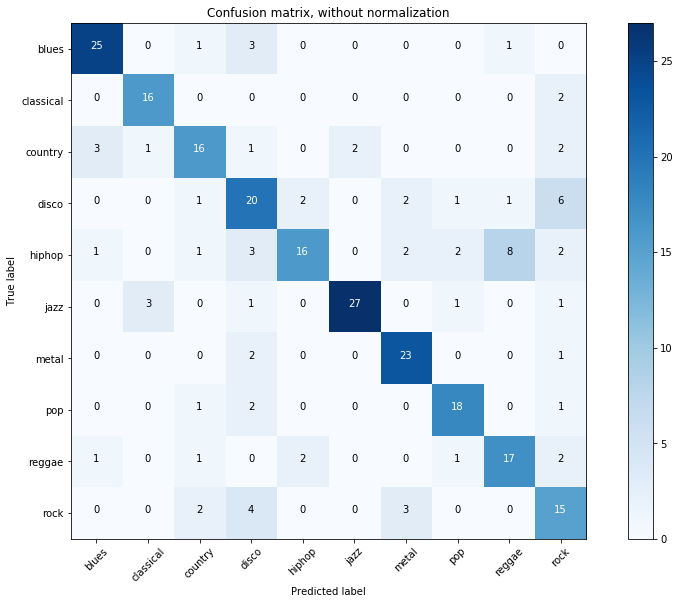

In [45]:
# Plot non-normalized confusion matrix
label = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'] # class labels
fig=plt.figure()
plot_confusion_matrix(cnf_matrix, classes=label, title='Confusion matrix, without normalization')
fig.set_size_inches(12, 10)
ax = fig.add_subplot(111)
plt.show()
#fig.savefig('confusion_mat_LR_feature2.eps')  # save figure

# 10 fold cross validation of the training data

In [47]:
# import CV libraries
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10,shuffle=True,random_state=0)

In [48]:
X_c = scaled_train_data
y_c = y
df_cv = pd.DataFrame(X_c)
df_cv['label'] = y_c
train_index_all = np.zeros((10,810))
l = 0
sum = 0
for train_index, test_index in kf.split(df_cv):
    #print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    train_index_all[l,:] = train_index
    l = l + 1
    train_data_cv = X_c[train_index]
    label_train_cv = y_c[train_index]
    test_data_cv = X_c[test_index]
    label_test_cv = y_c[test_index]
    clf_lr.fit(train_data_cv,label_train_cv)
    y_pred_cv = clf_lr.predict(test_data_cv)    
#    clf_svm.fit(train_data_cv,label_train_cv)
#    y_pred_cv = clf_svm.predict(test_data_cv)
    y_true = label_test_cv
    y_pred = y_pred_cv
    print("Accuracy:",accuracy_score(y_true, y_pred))
    sum +=accuracy_score(y_true, y_pred)
    #sum += nltk.classify.accuracy(classifier, test_data)
average = sum/10.0
average

Accuracy: 0.611111111111
Accuracy: 0.688888888889
Accuracy: 0.666666666667
Accuracy: 0.655555555556
Accuracy: 0.655555555556
Accuracy: 0.611111111111
Accuracy: 0.677777777778
Accuracy: 0.711111111111
Accuracy: 0.644444444444
Accuracy: 0.744444444444


0.66666666666666674

# Using test data

In [53]:
# get tesing data and MFCC feature extraction
fun_dict2={}
test_directory = './validation/rename'
for root, dirs, files in os.walk(test_directory):
    for name in files:
        data, samplerate = sf.read(test_directory+'/'+name)
        mfcc = librosa.feature.mfcc(y=data, sr=samplerate,n_mfcc=50)
        mfcc_transpose = mfcc.transpose()
        dummy = mfcc_transpose
        fun_dict2[name] = np.concatenate((dummy.mean(axis=0),dummy.var(axis=0),dummy.max(axis=0),dummy.min(axis=0),np.median(dummy,axis=0)))

In [54]:
#convert dictionary to  dataframe (validation Data) 
test_data2=pd.DataFrame(fun_dict2)
test_data2=test_data2.transpose()
test_data2.index = range(0,len(test_data2))

# scaling of testing data
test_data2_scaled =pd.DataFrame(test_data2)
scaler=StandardScaler()
scaler.fit(test_data2_scaled)
scaled_test_data2=scaler.transform(test_data2_scaled)

In [55]:
# predict test data classes with logistic regression (LR) and save the results in excel file
clf_lr.fit(X,y) # X = train data, y = train level
lr_pred = clf_lr.predict(scaled_test_data2)
df = pd.DataFrame(list(lr_pred))
df.to_excel('output_lr.xlsx', header='class', index=False)

In [56]:
# predict test data classes with SVM and save the results in excel file
clf_svm.fit(X,y)
svc_pred = clf_svm.predict(scaled_test_data2)
df = pd.DataFrame(list(svc_pred))
df.to_excel('output_svc.xlsx', header='class', index=False)

# use those training data with good accuracy for training and then testing

In [58]:
results_index = [int(i) for i in list(train_index_all[9,])] # training set index with good accuracy from CV
X_new = scaled_train_data[results_index]
y_new = y[results_index]

In [59]:
# predict test data classes with SVM and save the results in excel file
clf_svm.fit(X_new,y_new)
svc_pred = clf_svm.predict(scaled_test_data2)
df = pd.DataFrame(list(svc_pred))
df.to_excel('output_CV.xlsx', header='class', index=False)

# CV with random shuffling of the data

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cross_val_score(clf_svm, X_c, y_c, cv=cv)

array([ 0.67777778,  0.78888889,  0.66666667,  0.8       ,  0.74444444,
        0.7       ,  0.67777778,  0.7       ,  0.65555556,  0.77777778])